## Лабораторная работа №3

# Метод сеток решения одномерного нестационарного уравнения теплопроводности

### Задание 2

**Промоделировать стационарные процессы теплопроводности стержня в зависимости от входных данных задачи – переменного коэффициента теплопроводности k(x) и плотности источников тепла f(x):**

$$\begin{cases} 
   -\frac {d}{dx} (k(x) \cdot \frac {du}{dx}) = f, \\
   u(a) = U_A, u(b) = U_B.
\end{cases}$$  

Где $f(x) = c \cdot \delta \cdot (x - x_0), \ \delta(x)$ - дельта-функция.

###  Вывод используемых формул

Рассмотрим интегральное уравнение баланса, которое на любом отрезке $[a, b]$, где $0 < a < b < l$, имеет вид:

$$
W(a) - W(b) - \int_a^b q(x)u(x)dx + \int_a^b f(x)dx = 0.
$$

В нашем условии $q(x) = 0$, поэтому перепишем уравнение в следующем виде:

$$
W(a) - W(b) + \int_a^b f(x)dx = 0.
$$

Здесь $W(x) = -k(x)u'(x)$.

Введем на равномерной сетке

$$
x_n = nh, \ n=0,1,2,...,N, \ Nh = l
$$

промежуточные (потоковые) узлы

$$
x_{n+-0.5} = x_n +- 0.5h
$$

и запишем уравнение баланса на отрезке $[x_{n-0.5}, x_{n+0.5}]$:

$$
W_{n-0.5} - W_{n+0.5} + \int_{x_{n-0.5}}^{x_{n+0.5}} f(x)dx = 0.
$$

Найдём значения $W_{n-0.5}$ и $W_{n+0.5}$. 

Для этого проинтегрируем равенство $u'(x)=-\frac{W(x)}{k(x)}$ на отрезке $[x_{n-1}, x_n]$:

$$
u_{n-1} - u_n = \int_{x_{n-1}}^{x_n} \frac{W(x)}{k(x)}dx.
$$

Полагая, что $W(x) \approx W_{n-0.5}$ при $x_{n-1} \leq x \leq x_n$,

получим при $x_{n-0.5} \leq x \leq x_{n+0.5}$:

$$
W_{n-0.5} \approx -a_n\frac{y_n-y_{n-1}}{h},
$$
где 
$$
a_n = \frac {h}{\int_{x_{n-1}}^{x_n} \frac {dx}{k(x)}}.
$$

Аналогично
$$
W_{n+0.5} \approx -b_n\frac{y_{n+1}-y_{n}}{h},
$$
где
$$
b_n = \frac {h}{\int_{x_{n+1}}^{x_n} \frac {dx}{k(x)}}.
$$

Также введём обозначение:

$$
\varphi_n = \frac{1}{h} \int_{x_{n-0.5}}^{x_{n+0.5}} f(x)dx.
$$

Получим консервативную разностную схему:

$$
\begin{cases}
\frac{1}{h}(b_n\frac{u_{n+1}-u_{n}}{h} -a_n\frac{u_n-u_{n-1}}{h}) = -\varphi_n, \ n = 1, 2, ..., N-1,\\
u_0 = U_a, \ u_N = U_b.
\end{cases}
$$

Раскрыв скобки в верхнем выражении, получим:

$$
\begin{cases}
\frac{a_n}{h^2}u_{n-1} - \frac{a_n + b_n}{h^2}u_n + \frac{b_n}{h^2}u_{n+1} = -\varphi_n, \ n = 1, 2, ..., N-1,\\
u_0 = U_a, \ u_N = U_b.
\end{cases}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
a = 0.2
b = 1.2
Ua = 0
Ub = 0
h = (b - a) / 150

X = np.arange(a, b + h, h)

k1, k2, k3 = 0, 0, 0   #теплопроводность материалов
k12, k23 = 0, 0        #границы материалов

hs = [(0, 0)]  #источники тепла (heat sources), 
               #параметры:(точка, мощность)

In [3]:
conditions = [[0.01, 100, 1, a+(b-a)/2, b+h, 'k1<<k2'],
              [100, 0.01, 1, a+(b-a)/2, b+h, 'k1>>k2'],
              [1, 2, 4, a+(b-a)/3, a+2*(b-a)/3, 'k1<k2<k3'],
              [4, 2, 1, a+(b-a)/3, a+2*(b-a)/3, 'k1>k2>k3'],
              [1, 2, 1, a+(b-a)/3, a+2*(b-a)/3, 'k1=k, k2=2k, k3=k'],
              [20, 1, 20, a+(b-a)/3, a+2*(b-a)/3, 'k1=20k, k2=k, k3=20k']]

heat_sources = [[(a+(b-a)/2, 4)], 
                [(a+(b-a)/4, 4), (b-(b-a)/4, 4)], 
                [(a+(b-a)/4, 4), (b-(b-a)/4, 16)],
                [(a+(b-a)/3, 4)]]

hs_desc = ['Один источник посередине', 
           'Два одинаковых источника симметрично', 
           'Два разных источника симметрично', 
           'Один источник на 1/3 слева']

In [4]:
def a_n(n):
    if X[n] <= k12:
        return k1
    elif X[n-1] < k12 < X[n]:
        return h / ((k12-X[n-1])/k1 + (X[n]-k12)/k2)
    elif X[n] <= k23:
        return k2
    elif X[n-1] < k23 < X[n]:
        return h / ((k23-X[n-1])/k2 + (X[n]-k23)/k3)
    else:
        return k3

def b_n(n):
    if X[n+1] <= k12:
        return k1
    elif X[n] < k12 < X[n+1]:
        return h / ((k12-X[n])/k1 + (X[n+1]-k12)/k2)
    elif X[n+1] <= k23:
        return k2
    elif X[n] < k23 < X[n+1]:
        return h / ((k23-X[n])/k2 + (X[n+1]-k23)/k3)
    else:
        return k3

In [5]:
def phi(x, hsp, c):  #hsp - heat source point, c - const (мощность)
    if abs(x - hsp) == h / 2:
        return c / 2
    elif x - h/2 < hsp < x + h/2:
        return c
    else:
        return 0

In [6]:
def task2():
    n = int((b-a)/h)+1
    M = np.zeros((n, n))
    V = np.zeros(n)
    M[0, 0], M[-1,-1] = 1, 1
    V[0], V[-1] = 0, 0
    for i in range(1, n-1):
        M[i, i-1] = a_n(i)
        M[i, i] = -a_n(i) - b_n(i)
        M[i, i+1] = b_n(i)
        V[i] = -h * sum(phi(X[i], hsp, c) for hsp, c in hs)
    return np.linalg.solve(M, V)

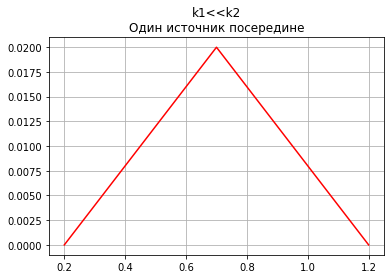

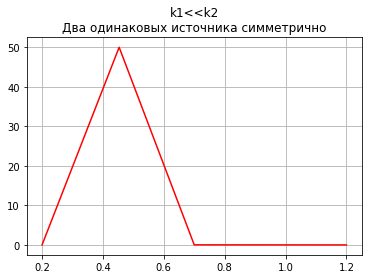

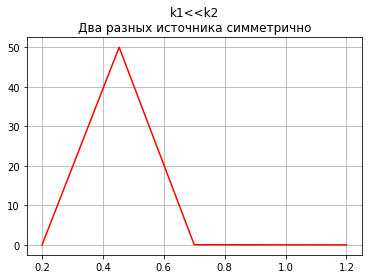

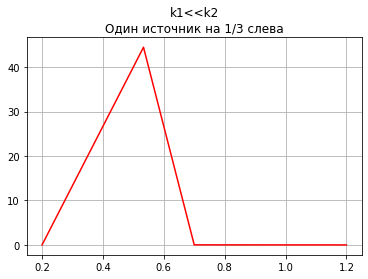

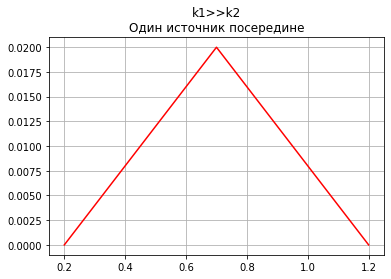

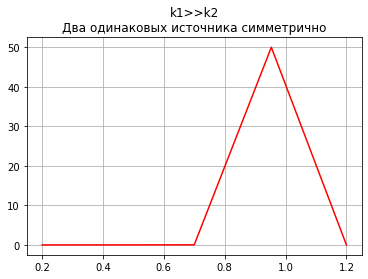

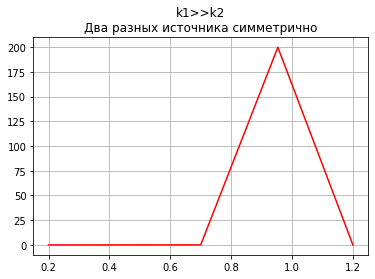

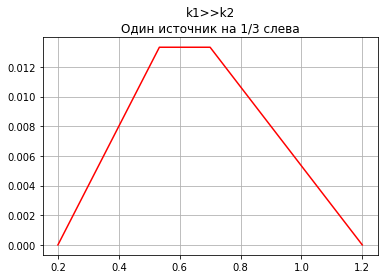

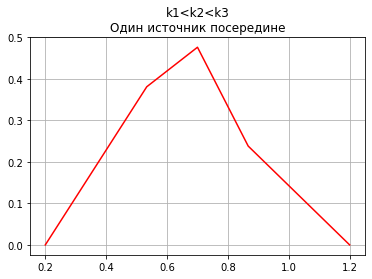

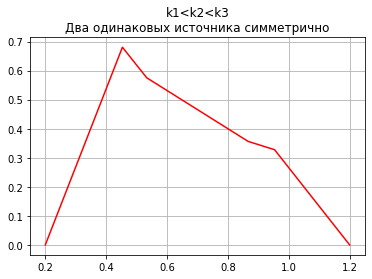

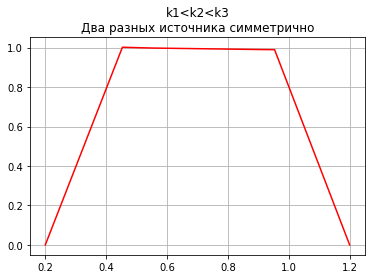

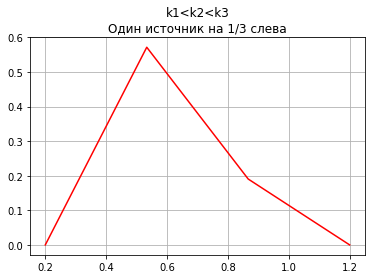

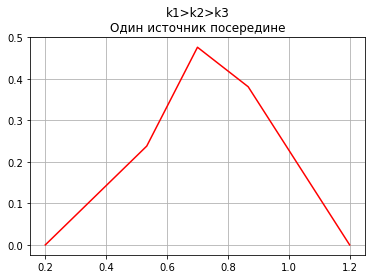

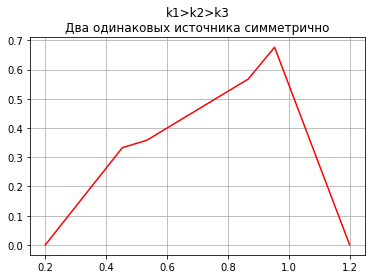

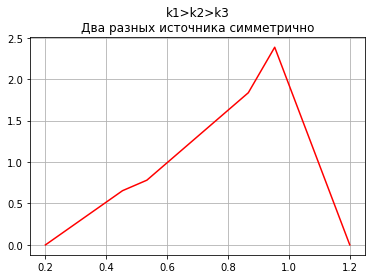

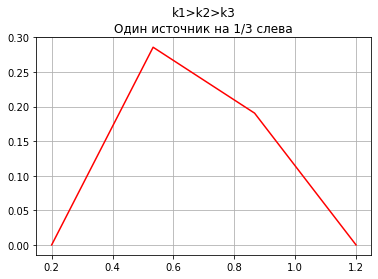

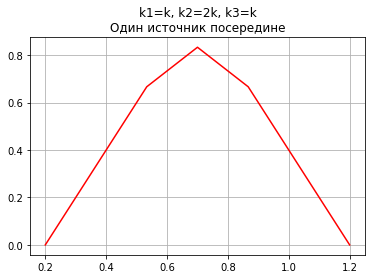

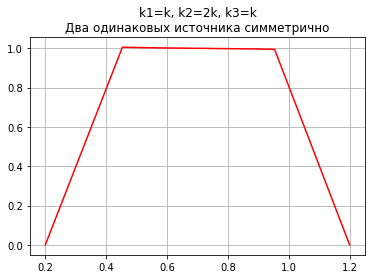

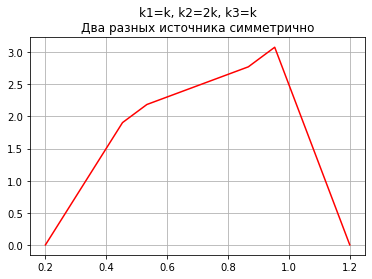

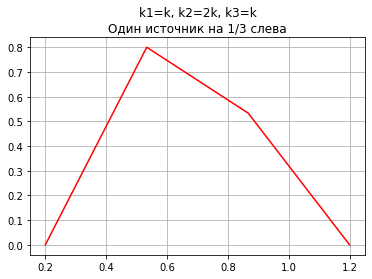

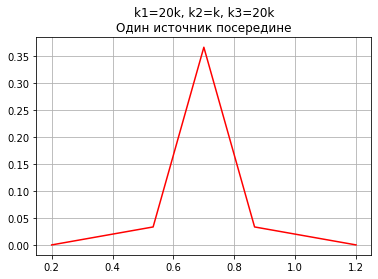

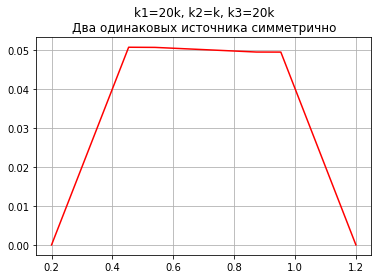

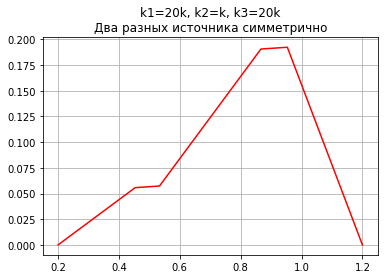

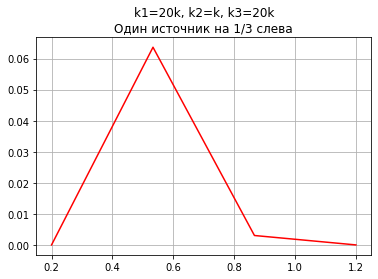

In [7]:
for _k1, _k2, _k3, _k12, _k23, k_info in conditions:
    k1, k2, k3, k12, k23 = _k1, _k2, _k3, _k12, _k23
    for heat_source, hs_info in zip(heat_sources, hs_desc):
        hs = heat_source
        plt.plot(X, task2(), color='red')
        plt.title(k_info + '\n' + hs_info)
        plt.grid()
        plt.show()

### Доп задание

$$
\frac {d^2u}{dx^2} = -\delta(x-0.5)\\
u(0)=0, \ u(1)=0
$$

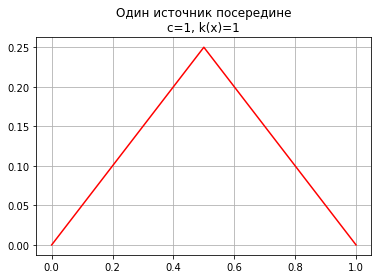

In [8]:
a = 0
b = 1
Ua = 0
Ub = 0
h = (b - a) / 150

X = np.arange(a, b + h, h)

k1, k2, k3 = 1, 0, 0   #теплопроводность материалов
k12, k23 = b+h, b+h        #границы материалов

hs = [(a+0.5, 1)]
    
plt.plot(X, task2(), color='red')
plt.title('Один источник посередине\nc=1, k(x)=1')
plt.grid()
plt.show()

### Вывод формул для задач 3 и 4

Рассмотрим уравнение теплопроводности

$$
Lu \equiv \frac{\partial u}{\partial t} - \frac{\partial^2 u}{\partial x^2}  = f(x, t),
$$

Воспользуемся формулами для аппроксимации производных:

$$
\frac{\partial u}{\partial t} = \frac{u(x, t + \tau) - u(x, t)}{\tau}
$$

$$
\frac{\partial^2 u}{\partial x^2} = \frac{u(x+h, t) - 2u(x, t) + y(x-h, t)}{h^2}
$$

Получим:

$$
Lu = \frac{u(x, t + \tau) - u(x, t)}{\tau} - \frac{u(x+h, t) - 2u(x, t) + y(x-h, t)}{h^2}
$$

Отсюда выразим $u(x, t + \tau)$:

$$
u(x, t + \tau) = u(x, t) + \tau(\frac{u(x + h, t)}{h^2} - 2 \frac{u(x, t)}{h^2} + \frac{u(x-h, t)}{h^2})
$$

Приведём слагаемые. Получим:

$$
u(x, t + \tau) = \frac{\tau}{h^2}u(x-h,t) + (1 - \frac{\tau}{h^2})u(x,t) + \frac{\tau}{h^2}u(x+h, t)
$$ 

### Задание 3

**Промоделировать нестационарные процессы теплопроводности в зависимости от входных данных задачи − коэффициента теплопроводности и начальной температуры:**

$$\begin{cases} 
   \frac {du}{dt}= \frac {d}{dx} (k(x) \cdot \frac {du}{dx}) + f(x) \cdot (1 - e^{-t}), \;\; 0 < x < l, \ 0 < t < T, \\
   u(0, t) = U_A, \ u(l, t) = U_B, \qquad \qquad \;\;\: 0 \leq t \leq T,\\
   u(x, 0) = \varphi(x), \qquad \qquad \qquad \qquad \;\;\; 0 \leq x \leq l.
\end{cases}$$  

В этом задании аппроксимировать будем следующим образом:

$$
\frac{\partial}{\partial x}(k(x)\frac{\partial u}{\partial x}) = \frac{k(x+\frac{h}{2})u'(x+\frac{h}{2}) - k(x-\frac{h}{2})u'(x-\frac{h}{2})}{\frac{h}{2}}
$$

Аппроксимируя $\frac{\partial u}{\partial x}$ и выражая $u(x, t+\tau)$ получим:

$$
u(x,t+\tau)= \frac{k(x-\frac{h}{2})\tau}{h^2}u(x-h, t) + 
(1 - \frac{(k(x-\frac{h}{2})-k(x+\frac{h}{2}))\tau}{h^2}u(x, t) + \frac{k(x+\frac{h}{2})\tau}{h^2}u(x+h, t)
$$

In [9]:
a = 0.2
b = 1.2
Ua = 4
Ub = 1

h = 1/12
X = np.arange(a, b+h, h)

tau = 0.0005
t = 12800*tau
T = np.arange(0, t+tau, tau)
t_list = [0, 20, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]

In [10]:
def k(x):
    return x**2

def f(x):
    return 1 + x**(1/3)

def phi(x):
    #return 5*x**2 - 10*x + 5.8
    return 15*x**2 - 24*x + 8.2

In [11]:
def task3():
    M = np.zeros((T.size, X.size))
    M[1:,0] = [Ua for i in range(T.size-1)]
    M[1:,-1] = [Ub for i in range(T.size-1)]
    M[0,:] = [phi(x) for x in X]
    for i in range(1, T.size):
        for j in range(1, X.size-1):
            M[i][j] = k(X[j]-h/2)*tau/(h ** 2) * M[i-1][j-1] + (1-(k(X[j]-h/2)+k(X[j]+h/2))*tau/(h ** 2)) * M[i-1][j] + k(X[j]+h/2)*tau/(h ** 2) * M[i-1][j+1] + tau * f(X[j])*(1-math.exp(-T[i]))
    return M

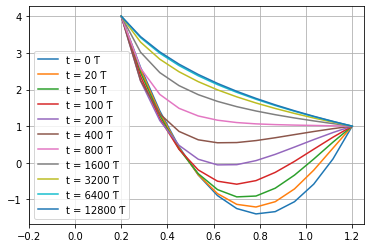

In [12]:
M = task3()
for t_i in t_list:
    plt.plot(X, M[t_i], label='t = {} Ƭ'.format(t_i))
plt.xlim(-0.2, 1.25)
plt.legend()
plt.grid()
plt.show()

## Задание 4

**Промоделировать нестационарные процессы теплопроводности в зависимости от входных данных задачи:**

$$\begin{cases} 
   \frac {du}{dt}= k(x) \cdot \frac {d^2u}{dx^2} + f(x, t), \qquad 0 < t \leq T,\\
   u(a, t) = g_1(t), \ u(b, t) = g_2(t), \;\;\; 0 < t \leq T,\\
   u(x, 0) = \varphi(x), \qquad \qquad \qquad a \leq x \leq b.
\end{cases}$$  

После аппроксимации, выразив $u(x, t+\tau)$, получим:
$$
u(x, t + \tau) = \frac{c \cdot \tau}{h^2}u(x-h,t) + (1 - \frac{c \cdot \tau}{h^2})u(x,t) + \frac{c \cdot \tau}{h^2}u(x+h, t),\ c - const
$$ 

In [13]:
a = 0
b = 2
h = (b-a)/10
X = np.arange(a, b+h, h)

k = 1

t = 0.2
tau = 0.05*((h**2)/k)
T = np.arange(0, t + tau, tau)

In [14]:
phi = lambda x: 0
g1 = lambda x: 0
g2 = lambda x: 0
f = lambda x,t: x

In [15]:
def task4():
    M = np.zeros((T.size, X.size))

    M[1:, 0] = [g1(t) for t in T[1:]]
    M[1:,-1] = [g2(t) for t in T[1:]]
    M[0,:] = [phi(x) for x in X]

    factors = [k*tau / h**2, 1 - 2*k*tau / h**2, k*tau / h**2]

    for i in range(1, T.size):
        for j in range(1, X.size - 1):
            M[i][j] = M[i-1, j-1:j+2].dot(factors) + tau*f(X[j], T[i])
    return M

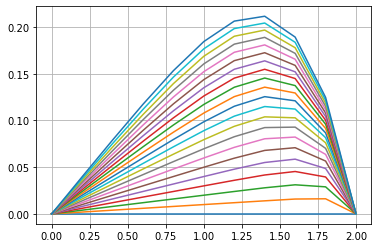

In [16]:
M = task4()
for t_i in range(0, T.size, 5):   
    plt.plot(X, M[t_i], label=t_i)
plt.grid()
plt.show()